# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [8]:
# Libraries
import numpy as np
import pylab as plt
import seaborn as sns
from pandas.plotting import andrews_curves
#import lux
import pandas as pd
import qgrid
from itables import init_notebook_mode
from itables import show

plt.rcParams['figure.figsize']=(12, 4)  # tamaño por defecto para los plots

In [6]:
%pip install itables

     |████████████████████████████████| 193 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install qgrid

     |████████████████████████████████| 889 kB 2.9 MB/s eta 0:00:01


  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761272 sha256=df1962423ad9d71b903376c827c937ee681da714c9c160a0681a603a63fb99d2
  Stored in directory: /Users/lcorrea/Library/Caches/pip/wheels/65/29/13/1def97680a393587b2a731261dbef083633a1586fbd785446e
Successfully built qgrid
Note: you may need to restart the kernel to use updated packages.


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here

fitbit = pd.read_csv('/Users/lcorrea/Documents/GitHub/5.2-lab-matplotlib-seaborn/data/Fitbit2.csv')



#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [11]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here


avg_month = fitbit.Months_encoded.mean()

avg_month

6.501362397820164

<AxesSubplot:xlabel='Months_encoded'>

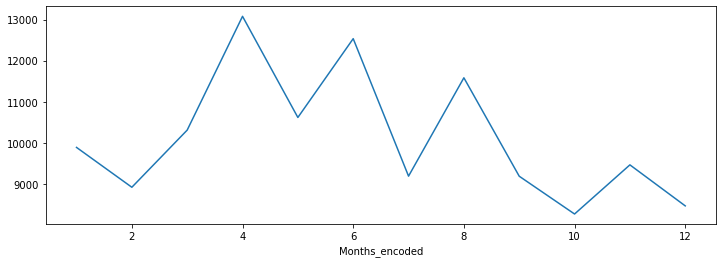

In [13]:
fitbit.groupby('Months_encoded').mean().Steps.plot(
    figsize=(12, 4))

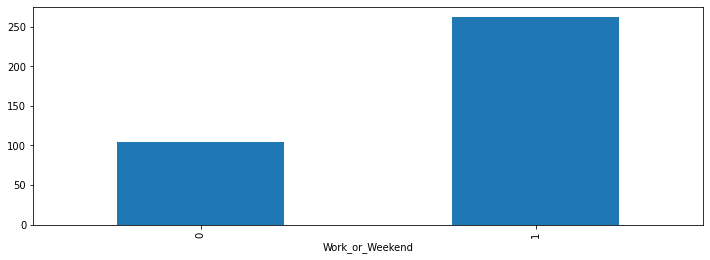

In [14]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here


work_or_weekend = fitbit.groupby('Work_or_Weekend').count().Steps.plot(
    kind="bar",
    figsize=(12,4))

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

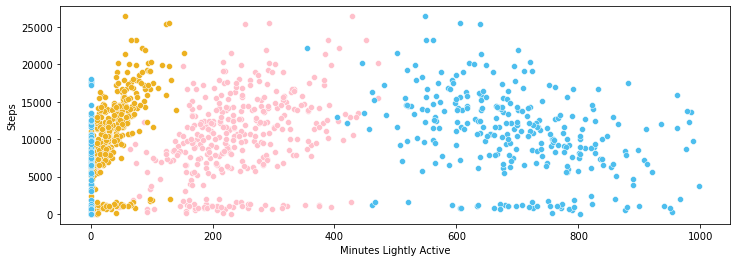

In [15]:
# your code here


scatter_plots=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for i in range(len(scatter_plots)):
    palette=['pink', '#EDB120', '#4DBEEE']
    sns.scatterplot(data=fitbit, x=scatter_plots[i], y='Steps', color=palette[i]);

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [18]:
# your code here


titanic = pd.read_csv('/Users/lcorrea/Documents/GitHub/5.2-lab-matplotlib-seaborn/data/titanic.csv')



#### Explore the titanic dataset using Pandas dtypes.

In [19]:
# your code here

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include='int64').columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [21]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [22]:
# your code here

plt.rcParams['figure.figsize']=(12, 6)
pd.set_option('display.max_columns',None)
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

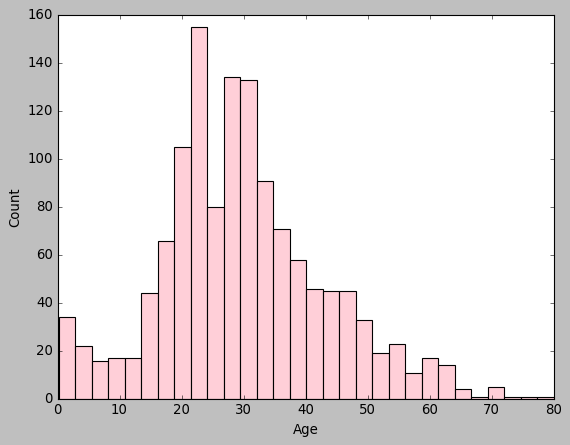

In [24]:
# your code here

sns.histplot(x=titanic.Age, color = 'pink')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

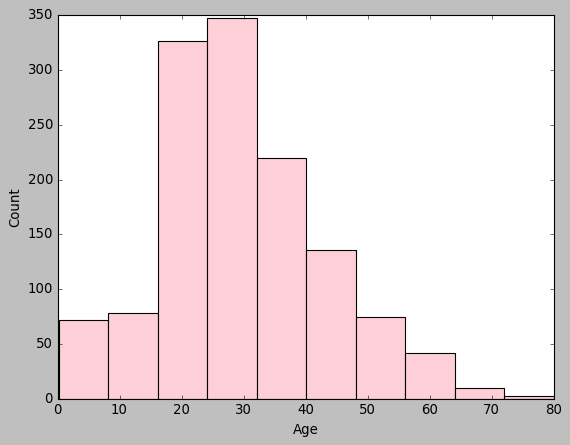

In [26]:
# your code here

sns.histplot(x=titanic.Age, color = 'pink', bins = 10)


<AxesSubplot:xlabel='Age', ylabel='Count'>

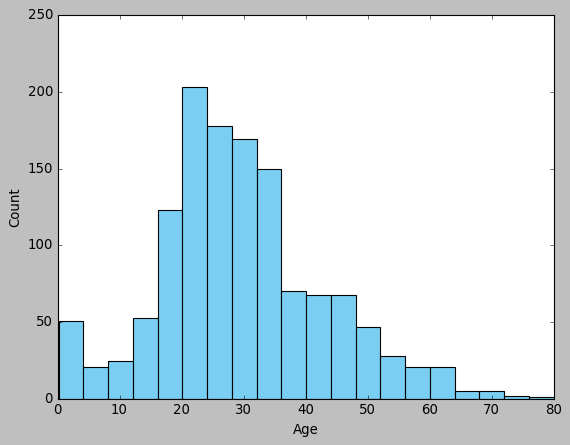

In [29]:

sns.histplot(x=titanic.Age, color = '#4DBEEE', bins = 20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

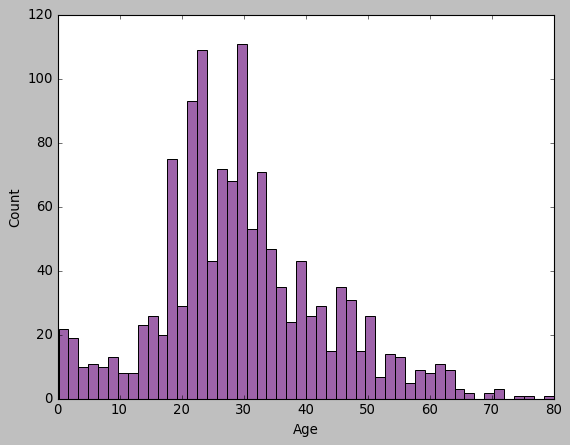

In [30]:

sns.histplot(x=titanic.Age, color = '#7E2F8E', bins = 50)

#### How does the bin size affect your plot?

In [ ]:
"""

 The first graphic is much more clear in terms of data, but the distribution itself is better in in the last graphic
 
"""

#### Use seaborn to show the distribution of column `Age`.

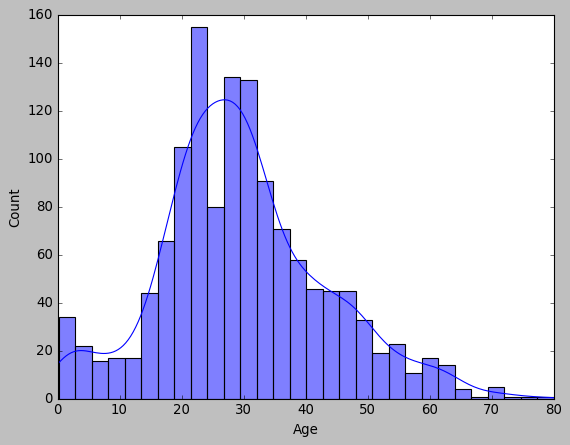

In [43]:
# your code here

sns.histplot(x=titanic.Age, 
             bins=30,
             kde=True, color = 'blue' # kernel density estimation
            );

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

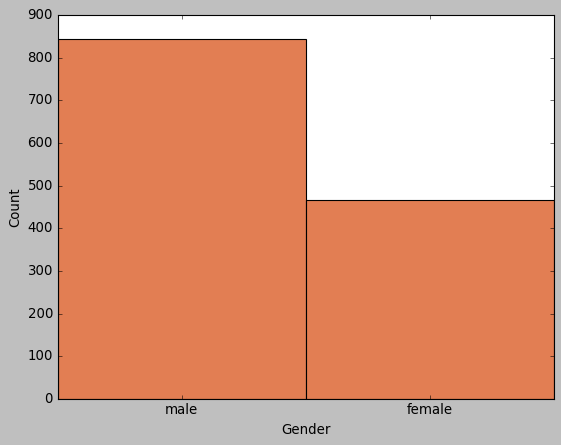

In [44]:
# Method 1 - matplotlib
# your code here


sns.histplot(x=titanic.Gender, color = '#D95319', bins = 10)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

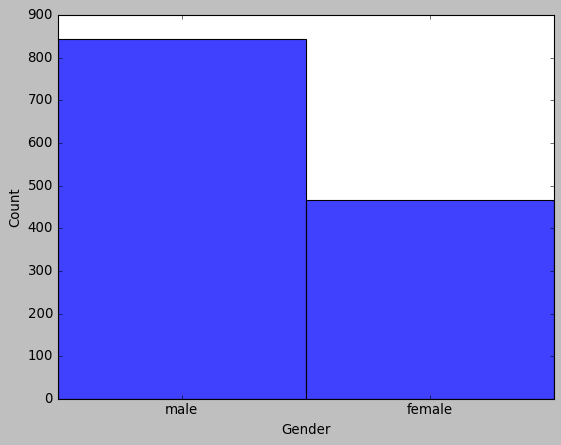

In [45]:
# Method 2 - seaborn
# your code here


sns.histplot(x=titanic.Gender)


#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

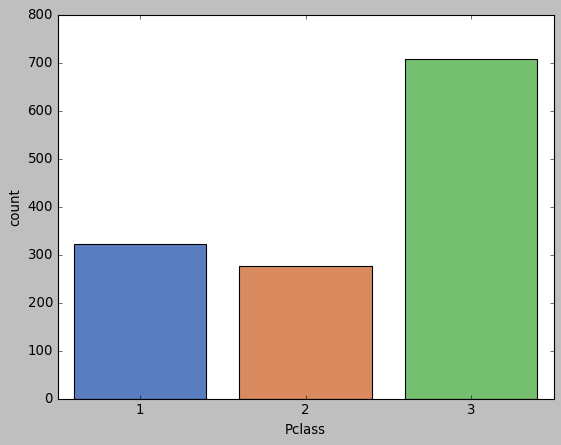

In [50]:
# your code here

sns.countplot(x=titanic.Pclass, palette='muted')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

/Users/lcorrea/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


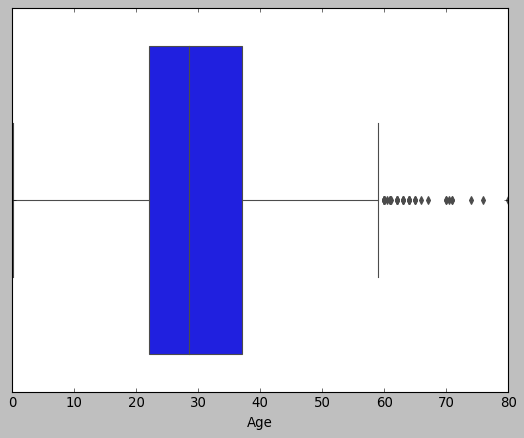

In [51]:
# your code here


sns.boxplot(titanic.Age); 

In [ ]:
"""
Box plot to know mean and outliers over 60years
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Box plot to know mean and outliers over 60year
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Users/lcorrea/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

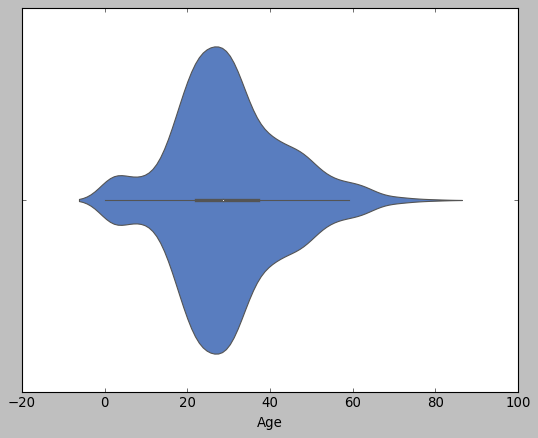

In [52]:
# your code here

sns.violinplot(titanic.Age, palette="muted")

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
when you want to observe the distribution of numeric data and also these are especially useful whenever you want to make a comparison of distributions between multiple group
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here


titanic.plot.scatter(x='Age', y='Fare',s=100)


In [ ]:
# Method 2 - seaborn
# your code here


sns.scatterplot(data= titanic, x='Age', y='Fare', palette='pastel',s=200 )

#### Plot the correlation matrix using seaborn.

In [53]:
# your code here


corr=titanic.corr(method='pearson')

In [54]:
sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(98, 90, as_cmap=True) 

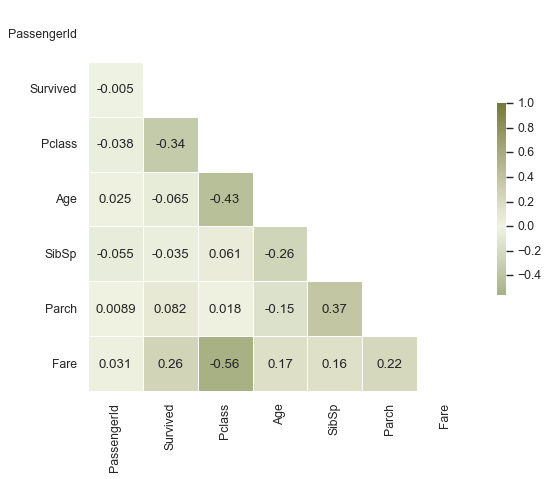

In [55]:
sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

#### What are the most correlated features?

In [ ]:
"""
pclass & Fare
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

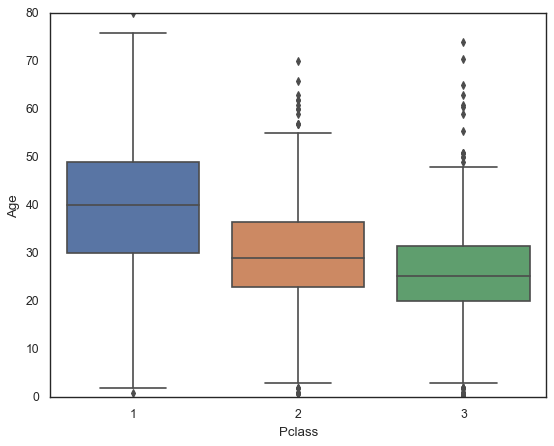

In [56]:
# your code here

sns.boxplot(data=titanic, x='Pclass', y='Age');

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

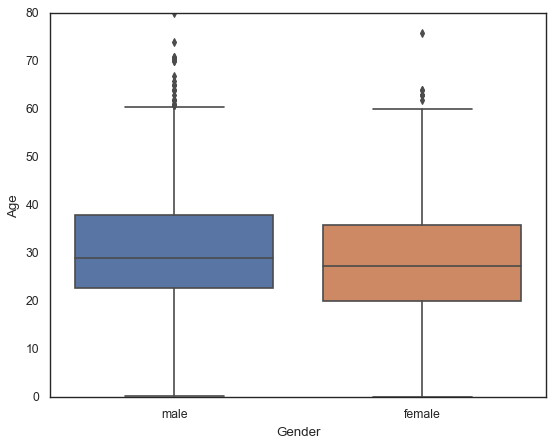

In [57]:
# your code here

sns.boxplot(data=titanic, x='Gender', y='Age');